### Internship on Data Science at InfraBIM
#### Project - Diabetes Prediction ####

Internship Reg. No.:1096

Name:S.Triveni Reddy

Date:07/03/2023


In [32]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

**Step 1: Load Dataset from S3 Bucket URL**

In [34]:
# Load the CSV Data into a DataFrame
url = "https://live-projects-data.s3.ap-south-1.amazonaws.com/diabetes.csv"
df = pd.read_csv(url)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [35]:
df.shape

(768, 9)

**Get Information about Dataset**

In [36]:
# Get Information about DataFrame including the index dtype and columns, non-null values and memory usage.
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [38]:
#checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
#stastistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
#checking the distribution of target variable
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Step 2: Visualize Data**

array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Outcome'}>]], dtype=object)

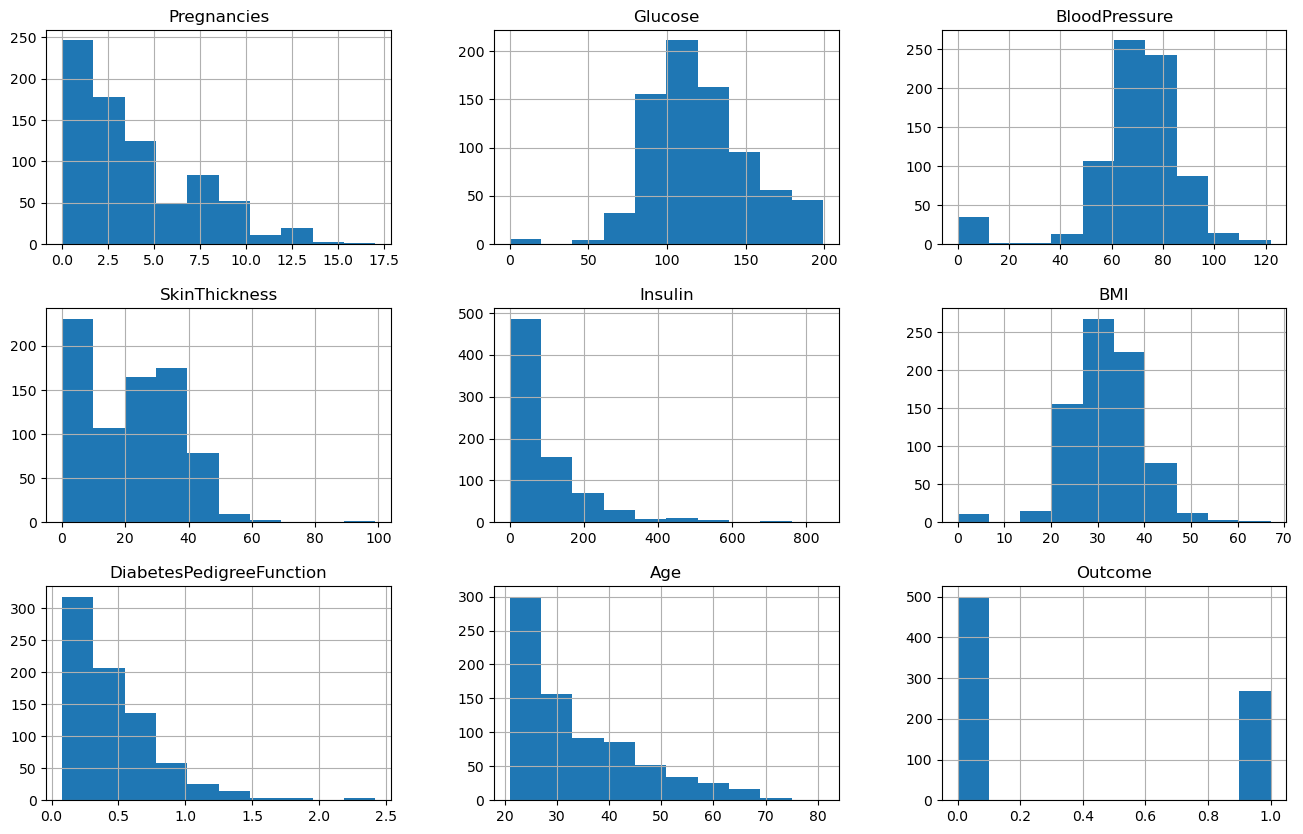

In [41]:
# Generate Histogram - It is a graphical representation of a grouped frequency distribution with continuous classes
df.hist(figsize=(16,10),bins=10)

<AxesSubplot: >

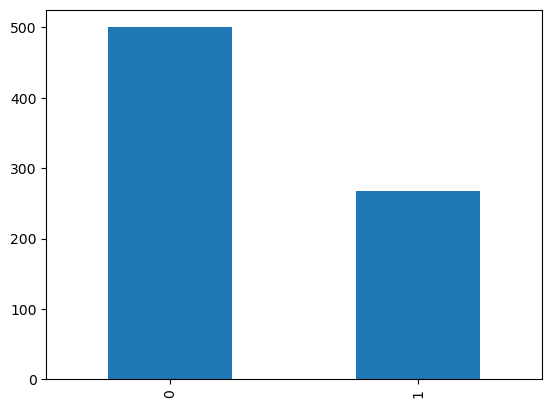

In [42]:
df.Outcome.value_counts().plot(kind="bar")

In [43]:
corr = df.corr(method='pearson',min_periods=1).round(2)
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130000,0.140000,-0.080000,-0.070000,0.020000,-0.030000,0.540000,0.220000
Glucose,0.130000,1.000000,0.150000,0.060000,0.330000,0.220000,0.140000,0.260000,0.470000
BloodPressure,0.140000,0.150000,1.000000,0.210000,0.090000,0.280000,0.040000,0.240000,0.070000
SkinThickness,-0.080000,0.060000,0.210000,1.000000,0.440000,0.390000,0.180000,-0.110000,0.070000
Insulin,-0.070000,0.330000,0.090000,0.440000,1.000000,0.200000,0.190000,-0.040000,0.130000
BMI,0.020000,0.220000,0.280000,0.390000,0.200000,1.000000,0.140000,0.040000,0.290000
DiabetesPedigreeFunction,-0.030000,0.140000,0.040000,0.180000,0.190000,0.140000,1.000000,0.030000,0.170000
Age,0.540000,0.260000,0.240000,-0.110000,-0.040000,0.040000,0.030000,1.000000,0.240000
Outcome,0.220000,0.470000,0.070000,0.070000,0.130000,0.290000,0.170000,0.240000,1.000000


**Step 3: Identify Independent and Target Variables**

In [44]:
#Independent Variables
X=df.drop(['Outcome'], axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [45]:
#Target Variable
Y=df['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**Step 4: Split the dataset into 80% training data and 20% testing data**

In [46]:
# Splitting the dataset into 80% training data and 20% testing data.
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20)

**Step 5: Identify Algorithm**

In [47]:
# Creating a classifier object in sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 
               'KNeighborsClassifier',  'RandomForestClassifier', 
               'LinearDiscriminantAnalysis',  'GaussianNB', 'SVC']

#Model Preparation
num_trees = 200
max_features = 3
models = []
models.append(('LR',LogisticRegression(multi_class='ovr')))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=10)))
models.append(('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(probability=True)))




In [48]:
Score = pd.DataFrame({"Classifier":classifiers})

#Fit model
from sklearn.model_selection import KFold
results = []
names = []
scoring = 'accuracy'
model_score = []

for name,model in models:
    kfold = KFold(n_splits=5,shuffle=False)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_score.append(cv_results.mean()*100)
    
Score["Accuracy"] = model_score
Score.sort_values(by="Accuracy", ascending=False, inplace = True) 
Score

,Classifier,Accuracy
0,LogisticRegression,76.222844
4,LinearDiscriminantAnalysis,76.218846
3,RandomForestClassifier,75.573770
6,SVC,74.918033
2,KNeighborsClassifier,74.912702
5,GaussianNB,74.759430
1,DecisionTreeClassifier,69.874717


**Step 6: Fit or Train Model**

In [49]:
# Fit Model
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1
 0 1 1 0 0 0]


**Step 7: Predict using Test Data**

In [59]:
# Predict using Test Data
model.predict([[6,148,72,35,0,33.6,0.627,50]])

array([1])

In [61]:
model.predict([[1,93,70,31,0,30.4,0.315,23]])

array([0])

**Step 8: Check Accuracy**

In [62]:
# Check Confustio Matrix
result = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[98 11]
 [19 26]]


In [63]:
# Check Classification Report
result1 = classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       109
           1       0.70      0.58      0.63        45

    accuracy                           0.81       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154



In [64]:
# Check Accuracy Score
result2 = accuracy_score(Y_test,y_pred)
print("Accuracy:",result2*100)


Accuracy: 80.51948051948052


**Step 9: Test Model using Other Sample Data**

In [65]:
# Test Model using sample data other than given dataset
model.predict([[0,73,80,30,0,30.4,0.415,25]])

array([0])

**Step 10: Create Pickle file**

In [66]:
# Plot Test Data with Visualize Prediciton
import pickle
pickle.dump(model,open("Diabetics.pkl","wb"))

In [68]:
model=pickle.load(open("Diabetics.pkl","rb"))
model

LogisticRegression(multi_class='ovr')

In [69]:
model.predict([[1,93,70,31,0,30.4,0.315,23]])

array([0])

# Refernces
https://www.kaggle.com/code/melikedilekci/diabetes-dataset-for-beginners

https://www.javatpoint.com/diabetes-prediction-using-machine-learning

https://www.analyticsvidhya.com/blog/2022/01/diabetes-prediction-using-machine-learning/
